<a href="https://colab.research.google.com/github/ronniegertman/Waves/blob/main/dispersion_relation_BZ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#assume triangle lattice with two kinds of atoms

def Ax(kx, ky):
  A_x = np.matrix([[2, -1*(1+ np.exp(-1*1j*np.sqrt(2)*kx))],
   [-1*(1+np.exp(1j*np.sqrt(2)*kx)), 2]])
  return A_x

def Ay(kx, ky):
  A_y = np.matrix([[2, -1*(np.exp(-1*1j*(kx+ky)/np.sqrt(2)) + np.exp(1*1j*(kx-ky)/np.sqrt(2)))],
         [-1*(np.exp(-1*1j*(kx+ky)/np.sqrt(2)) + np.exp(1*1j*(kx-ky)/np.sqrt(2))), 2]])
  return A_y


In [ ]:
def eigen(matrix):
  eigenvalues, eigenvectors = np.linalg.eig(matrix)
  return eigenvalues

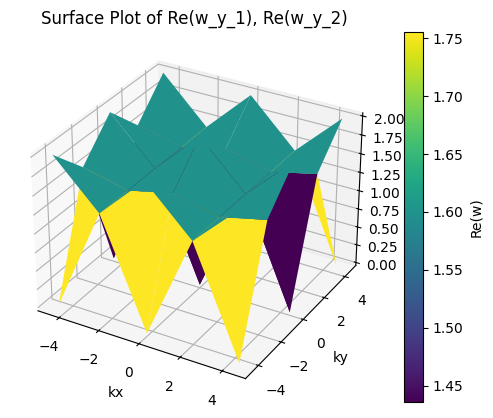

In [ ]:
kx_mesh, ky_mesh = np.meshgrid(kx_vec, ky_vec)
# w_x_1 = np.zeros_like(kx_mesh, dtype=complex)
# w_x_2 = np.zeros_like(kx_mesh, dtype=complex)
w_y_1 = np.zeros_like(ky_mesh, dtype=complex)
w_y_2 = np.zeros_like(ky_mesh, dtype=complex)


# Compute eigenvalues over the grid
for i, kx in enumerate(kx_vec):
    for j, ky in enumerate(ky_vec):
        eigenvalues_y = np.linalg.eigvals(Ay(kx, ky))
        w_y_1[j, i] = np.sqrt(eigenvalues_y[0])
        w_y_2[j, i] = np.sqrt(eigenvalues_y[1])


# Extract the real or imaginary part for plotting
z1 = w_y_1.real
z2 = w_y_2.real

# Create a 3D surface plot
fig = plt.figure()
ax = plt.axes(projection='3d')
surf = ax.plot_surface(kx_mesh, ky_mesh, z1, cmap='viridis', edgecolor='none')
ax.plot_surface(kx_mesh, ky_mesh, z2, cmap='viridis', edgecolor='none')
plt.colorbar(surf, label="Re(w)")

# Set plot labels
ax.set_xlabel("kx")
ax.set_ylabel("ky")
ax.set_zlabel("Re(w)")
plt.title("Surface Plot of Re(w_y_1), Re(w_y_2)")
plt.show()


